# <center> Clustering  </center> 


Clustering, also known as data partitioning, is an unsupervised learning technique that aims to group a set of data into different groups or "clusters". Each cluster groups elements with similar characteristics. The objective of clustering is to maximize intra-cluster similarity (between elements of the same group) and to minimize inter-cluster similarity (between elements of different groups).
 In this notebook, we will use a clustering method:
 - K-means: This is a popular and widely used method in machine learning. It is based on the idea of finding the 'k' cluster centers (means) that minimize the distance between each data point and the nearest center. The steps of the algorithm are as follows: (i) initialize 'k' cluster centers randomly, (ii) assign each data point to the nearest cluster center, (iii) update the cluster centers by calculating the mean of all data points assigned to each cluster, (iv) repeat steps (ii) and (iii) until the cluster centers no longer change or the maximum number of iterations is reached.

# Clustering avec Kmean

In [1]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans


In [2]:
# Set working directory
path ="/data/sritharan/Paris/Analyses_models/PCA/Final/"
os.chdir(path)

In [3]:
# Load data
df=pd.read_csv("file_name.csv",index_col=0)

In [4]:
# Select columns for clustering
coord= df[['eigenvector_1', 'eigenvector_2']]

In [5]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3)

In [6]:
# Fit KMeans
kmeans.fit(coord)

/ibpc/lumo/sritharan/.conda/envs/mdanalysis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
# Predict clusters
y_kmeans = kmeans.predict(coord)

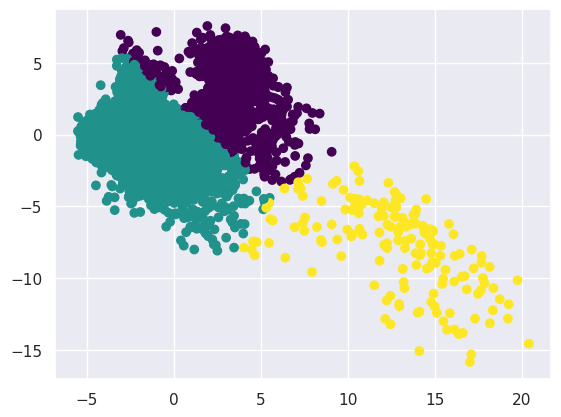

In [8]:
# Plot clusters
plt.scatter(df['eigenvector_1'], df['eigenvector_2'], c=y_kmeans, cmap='viridis')

# Centroids

In [9]:
# Get the coordinates of the cluster centers
centroids = kmeans.cluster_centers_


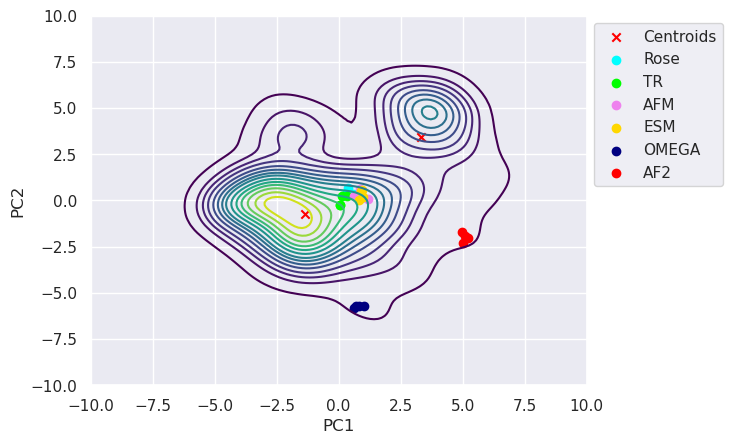

In [10]:
# Define the limits of the x-axis
x_min = -10
x_max = 10

# Define the limits of the y-axis
y_min = -10
y_max = 10

# Create a density plot of the clustering results
sns.kdeplot(data=df, x="eigenvector_1", y="eigenvector_2", cmap='viridis', levels=15)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')

colors = ["aqua", "lime", "violet", "gold", "navy", "red"]
categories = df.loc[df['size'] == 'start', 'models'].unique()

for category, color in zip(categories, colors):
    plt.scatter(df[(df['size']=='start') & (df['models']==category)]['eigenvector_1'], 
                df[(df['size']=='start') & (df['models']==category)]['eigenvector_2'], 
                c=color, 
                label=category)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('plot_densite_clusters.png' ,dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Centroids

In [11]:
# Print the centroids
centroids

array([[ 3.33847809,  3.4178724 ],
       [-1.34242402, -0.73500774],
       [12.69347101, -7.77381391]])

In [20]:
# Load data into a DataFrame
df = pd.read_csv("file_name.csv")

# Initialize KMeans
kmeans = KMeans(n_clusters=3)

# Fit KMeans
kmeans.fit(df[['eigenvector_1', 'eigenvector_2']])

# Get the coordinates of the cluster centers
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

# Calculate Euclidean distances between data rows and the centroids
distances = np.linalg.norm(df[['eigenvector_1', 'eigenvector_2']].values - centroids[:, None], axis=2)

# Get the index of the minimum distance for each data point
closest_centroids_idx = np.argmin(distances, axis=0)

# Add closest centroid and its distance to the dataframe
df['closest_centroid'] = closest_centroids_idx
df['distance_to_closest_centroid'] = distances[closest_centroids_idx, range(distances.shape[1])]

# Print rows closest to each centroid
for i, centroid in enumerate(centroids):
    closest_row = df[df['closest_centroid'] == i].nsmallest(1, 'distance_to_closest_centroid')
    print("\n\n")
    print(f"=============================================")
    print(f"Information for centroid {i} at location {centroid}:")
    print(f"---------------------------------------------")
    print(f"Closest row details: Frame - {closest_row['Unnamed: 0'].values[0]}, Model - {closest_row['models'].values[0]}")


/ibpc/lumo/sritharan/.conda/envs/mdanalysis/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids:
 [[-1.34531762 -0.74376984]
 [ 3.30701053  3.41143854]
 [12.69347101 -7.77381391]]



Information for centroid 0 at location [-1.34531762 -0.74376984]:
---------------------------------------------
Closest row details: Frame - 2358, Model - TR



Information for centroid 1 at location [3.30701053 3.41143854]:
---------------------------------------------
Closest row details: Frame - 1835, Model - TR



Information for centroid 2 at location [12.69347101 -7.77381391]:
---------------------------------------------
Closest row details: Frame - 6633, Model - AF2
